In [1]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# from tensorflow.python.framework import ops
# ops.reset_default_graph()

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math


from numpy.fft import rfft,irfft,rfftfreq
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# test signal
data = np.loadtxt('../data/test.csv')[0]

#function to filter out frequencies in signal that are above the threshold
def filter_signal(signal, threshold=5e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

clean_data = data[:20000]
scaler = MinMaxScaler(feature_range=(0, 5)) #init scaler, scales between 0 and 5
Y_old = scaler.fit_transform(np.asarray([i for i in range(len(clean_data)+1)]).reshape(-1,1)) #generate supervised output data

actions = np.asarray([filter_signal(clean_data)[:4001]]) #X - equivalent to actions
states = np.asarray(Y_old[:4001].copy()).T #Y - equivalent to states

x = np.asarray([actions[0][:4001]])
x = x.T

y = np.asarray([states[0][:4001]])
y = y.T

In [3]:
x.shape, y.shape

((4001, 1), (4001, 1))

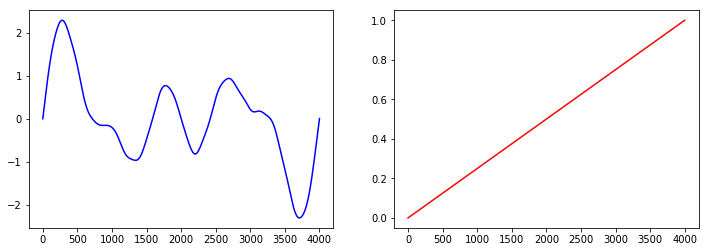

In [4]:
fig = plt.figure(figsize=(12,4))
a = plt.subplot(1,2,1)
plt.plot(x.flatten(),c='b')
a = plt.subplot(1,2,2)
plt.plot(y.flatten(),c='r')
plt.show()

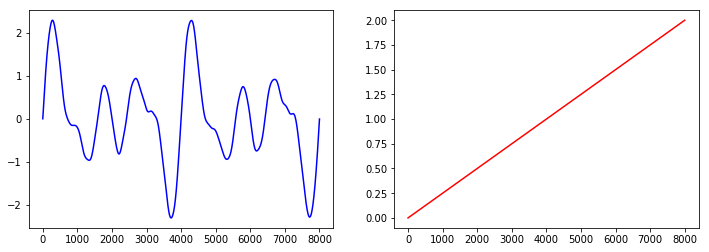

In [5]:
actions = np.asarray([filter_signal(clean_data)[:8001]]) #X - equivalent to actions
states = np.asarray(Y_old[:8001].copy()).T #Y - equivalent to states

xt = np.asarray([actions[0][:8001]])
xt = xt.T

yt = np.asarray([states[0][:8001]])
yt = yt.T

fig = plt.figure(figsize=(12,4))
a = plt.subplot(1,2,1)
plt.plot(xt.flatten(),c='b')
a = plt.subplot(1,2,2)
plt.plot(yt.flatten(),c='r')
plt.show()

In [6]:
trainX = np.array([np.array([x[:,0]])]).T
trainY = y[:,0]

testX = np.array([np.array([xt[:,0]])]).T
testY = yt[:,0]


print(trainX.shape)
print(trainY.shape)
print()
print(testX.shape)
print(testY.shape)

(4001, 1, 1)
(4001,)

(8001, 1, 1)
(8001,)


In [7]:
# np.array([np.array([x[:,0]])]).T.shape

In [19]:
model = Sequential()
model.add(LSTM(4, activation = 'tanh',input_shape=(1, 1)))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
4001/4001 - 7s - loss: 0.0741
Epoch 2/20
4001/4001 - 7s - loss: 0.0532
Epoch 3/20
4001/4001 - 9s - loss: 0.0488
Epoch 4/20
4001/4001 - 10s - loss: 0.0481
Epoch 5/20
4001/4001 - 7s - loss: 0.0477
Epoch 6/20
4001/4001 - 8s - loss: 0.0476
Epoch 7/20
4001/4001 - 8s - loss: 0.0477
Epoch 8/20
4001/4001 - 7s - loss: 0.0477
Epoch 9/20
4001/4001 - 6s - loss: 0.0477
Epoch 10/20
4001/4001 - 6s - loss: 0.0475
Epoch 11/20
4001/4001 - 7s - loss: 0.0476
Epoch 12/20
4001/4001 - 7s - loss: 0.0476
Epoch 13/20
4001/4001 - 7s - loss: 0.0476
Epoch 14/20
4001/4001 - 6s - loss: 0.0477
Epoch 15/20
4001/4001 - 7s - loss: 0.0476
Epoch 16/20
4001/4001 - 6s - loss: 0.0476
Epoch 17/20
4001/4001 - 7s - loss: 0.0477
Epoch 18/20
4001/4001 - 6s - loss: 0.0476
Epoch 19/20
4001/4001 - 6s - loss: 0.0476
Epoch 20/20
4001/4001 - 8s - loss: 0.0476


In [20]:
from sklearn.metrics import mean_squared_error


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

mean_squared_error(testY,testPredict)





0.5450189453882452

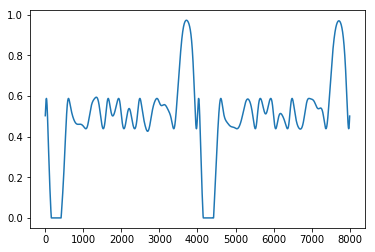

In [21]:
plt.plot(testPredict)

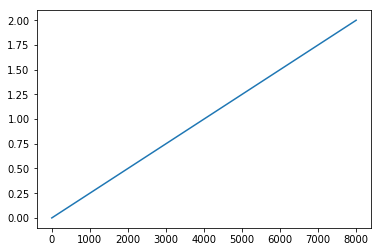

In [22]:
plt.plot(testY)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed

e = 30
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(1, 1)))
model.add(RepeatVector(1))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=e, batch_size=1, verbose=2)

Epoch 1/30


In [ ]:
from sklearn.metrics import mean_squared_error
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#view mse
print(mean_squared_error(testY,testPredict[:,0,0]))
#view output
# plt.plot(testPredict)
# plt.plot(testY)
# plt.show()

In [ ]:
plt.plot(trainPredict[:,0,0])
plt.show()

In [ ]:
plt.plot(testPredict[:,0,0])
plt.show()

In [ ]:
e = 30
model = Sequential()
model.add(LSTM(200, activation='tanh', input_shape=(1, 1)))
model.add(RepeatVector(1))
model.add(LSTM(200, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=e, batch_size=1, verbose=2)

In [ ]:
from sklearn.metrics import mean_squared_error
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#view mse
print(mean_squared_error(testY,testPredict[:,0,0]))
#view output
# plt.plot(testPredict)
# plt.plot(testY)
# plt.show()

In [ ]:
plt.plot(trainPredict[:,0,0])
plt.show()

In [ ]:
plt.plot(testPredict[:,0,0])
plt.show()